<a href="https://colab.research.google.com/github/alanchow85/AIUP2/blob/main/Lab1_Malware_Prediction_KNN(AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Collab notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.


# Malware Prediction using KNN

In this lab, we will be working with a Malware Dataset to train a K-Nearest-Neighbor model.



For a start, we will need to import the relavant library to help us with data manipulation


*   **pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
*   **matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   **seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

You can import the libraries in the beginning or at later stage just before you need it.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You will often see \# in the codes which is a comment that can be used to explain the codes or to temporary hide the codes from the execution

\# this is a comment

Let's download the malware_dataset.

In [ ]:
!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day1-am/malware_dataset_full.csv

--2023-06-16 02:36:34--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day1-am/malware_dataset_full.csv
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 52.219.132.143
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|52.219.132.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1874305 (1.8M) [text/csv]
Saving to: ‘malware_dataset_full.csv’

malware_dataset_ful 100%[===================>]   1.79M  1.45MB/s    in 1.2s    

2023-06-16 02:36:36 (1.45 MB/s) - ‘malware_dataset_full.csv’ saved [1874305/1874305]



In [ ]:
#Load the data
file_name = 'malware_dataset_full.csv' # this is the dataset csv file


After loading the file, let's make use of pandas library to read the file.

**pd.read_csv** requires the exact path of the file, and returns a dataframe.
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types, just like a table in an excel file.

**df.head** will return the first few records depending on the number indicated in the parentheses.

In [ ]:
df = pd.read_csv(file_name)
df.head(5)

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
0,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,air.G2JCuteBoySwimmingEscape.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.G2JSmallBoyFactoryEscape3.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,air.com.adobe.connectpro.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Guess what df.tail does?


In [ ]:
df.tail(5)

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
896,ebc4aa7e93e1d82dba2accced7c68e40.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
897,eda506a6c01c3c7e149ebaebcf929c40.apk,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
898,f3d8eb5c923390534da01d30d7dab130.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
899,fa8d4ee44044b0fad215cbd37b8a9646.apk,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
900,ff6648303056c0f09f584a0d01607bad.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**df.shape** returns a tuple that indicates the number of rows and columns in the dataframe.

In [ ]:
# Print the shape (Get the number of rows and cols)
df.shape

(901, 1000)

**df.columns** prints the columns name

As the list is very long, the bulk of the columns will be hidden. However you can still use df.columns.to_list() to display all the columns.


In [ ]:
# Get the column names
df.columns
# df.columns.to_list()


Index(['NAME', 'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_DRM_CERTIFICATES',
       'android.permission.ACCESS_EPHEMERAL_APPS',
       ...
       'com.lsbr.ipsos.mobile.permission.C2D_MESSAGE',
       'com.clue.android.permission.C2D_MESSAGE',
       'com.amazon.dcp.metrics.permission.METRICS_PERMISSION',
       'com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE',
       'android.permission.BROADCAST_PACKAGE_REPLACED',
       'com.active.aps.meetmobile.permission.C2D_MESSAGE',
       'com.android.email.permission.READ_ATTACHMENT',
       'android.permission.ACCESS_CORSE_LOCATION',
       'net.hubalek.android.apps.ba

There are 1000 columns in the dataset, how do we know what is the correlation between the columns, especially with regards to CLASS?

Let's make use of pandas **df.corr()** to find out.

Correlation is a statistical technique that shows how two variables are related

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,android.permission.ACCESS_FM_RADIO,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
android.permission.ACCESS_ALL_DOWNLOADS,1.000000,NaN,NaN,-0.001572,NaN,0.107439,0.706714,NaN,NaN,NaN,...,-0.001572,-0.001572,-0.002726,-0.001572,-0.005707,-0.001572,-0.001572,-0.001572,-0.001572,-0.033491
android.permission.ACCESS_BLUETOOTH_SHARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.permission.ACCESS_CACHE_FILESYSTEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.permission.ACCESS_CHECKIN_PROPERTIES,-0.001572,NaN,NaN,1.000000,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,-0.001111,-0.001111,-0.001111,0.046945
android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
com.active.aps.meetmobile.permission.C2D_MESSAGE,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,1.000000,-0.001111,-0.001111,-0.001111,-0.023668
com.android.email.permission.READ_ATTACHMENT,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,1.000000,-0.001111,-0.001111,-0.023668
android.permission.ACCESS_CORSE_LOCATION,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,-0.001111,1.000000,-0.001111,-0.023668
net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,-0.001572,NaN,NaN,-0.001111,NaN,-0.006995,-0.001111,NaN,NaN,NaN,...,-0.001111,-0.001111,-0.001927,-0.001111,-0.004033,-0.001111,-0.001111,-0.001111,1.000000,-0.023668


Some dataset may have duplicates and we can drop them by using drop_duplicates

By default, inplace = false and it will return a dataframe will remove duplicates and keep the original dataframe intact.

inplace = true will drop the duplicates directly from the dataframe.


In [ ]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

# dfnew = df.drop_duplicaes(inplace = False)

After dropping the duplicates, let's check if there is any changes to the number of rows of data

In [ ]:
#Show the new shape (number of rows & columns)
df.shape

(901, 1000)

We can make use of df.isnull() to check if there are any missing data to do any preprocessing if neccessary

In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()
# df.isnull().any()

NAME                                                         0
android.permission.ACCESS_ALL_DOWNLOADS                      0
android.permission.ACCESS_BLUETOOTH_SHARE                    0
android.permission.ACCESS_CACHE_FILESYSTEM                   0
android.permission.ACCESS_CHECKIN_PROPERTIES                 0
                                                            ..
com.active.aps.meetmobile.permission.C2D_MESSAGE             0
com.android.email.permission.READ_ATTACHMENT                 0
android.permission.ACCESS_CORSE_LOCATION                     0
net.hubalek.android.apps.barometer.permission.C2D_MESSAGE    0
CLASS                                                        0
Length: 1000, dtype: int64

The dataset contains both records that are malware(1) and also benign(0). Let's take a look at how many of each type of data.

In [ ]:
# list the CLASS and the number of records with it
df["CLASS"].value_counts()

0    599
1    302
Name: CLASS, dtype: int64

For ease of visualisation, we can also display it in a statistical graphic.

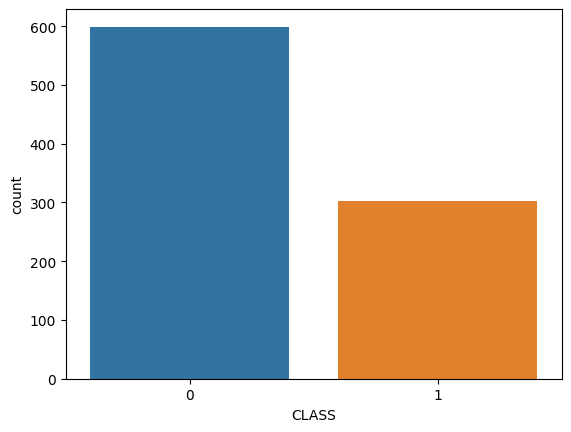

,NAME,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,...,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE,CLASS
0,a.envisionmobile.caa.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,air.G2JCuteBoySwimmingEscape.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,air.G2JSmallBoyFactoryEscape3.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,air.G2JValentineRoseEscape2017.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,air.com.adobe.connectpro.apk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sns.countplot(x=df["CLASS"])
plt.show()

df.head(5)

As seen in the earlier part of the lesson, KNN uses X and Y-axis. Using the dataset given, we can see that  "NAME" is not an important feature.

**Features** are the descriptive attributes, and **label** is what you're attempting to predict or forecast.

Thus, for x-axis, we will be using all the features columns, which means all columns except "CLASS" and "NAME".
And for y-axis, we will be using just the label, which is "CLASS"

In [ ]:
x = df.drop(['CLASS', 'NAME'], axis=1) #axis = 0 (drop by index), axis = 1 (drop by columns)
x.head()

,android.permission.ACCESS_ALL_DOWNLOADS,android.permission.ACCESS_BLUETOOTH_SHARE,android.permission.ACCESS_CACHE_FILESYSTEM,android.permission.ACCESS_CHECKIN_PROPERTIES,android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED,android.permission.ACCESS_DRM_CERTIFICATES,android.permission.ACCESS_EPHEMERAL_APPS,android.permission.ACCESS_FM_RADIO,...,android.permission.C2D_MESSAGE,com.lsbr.ipsos.mobile.permission.C2D_MESSAGE,com.clue.android.permission.C2D_MESSAGE,com.amazon.dcp.metrics.permission.METRICS_PERMISSION,com.amdroidalarmclock.amdroid.permission.C2D_MESSAGE,android.permission.BROADCAST_PACKAGE_REPLACED,com.active.aps.meetmobile.permission.C2D_MESSAGE,com.android.email.permission.READ_ATTACHMENT,android.permission.ACCESS_CORSE_LOCATION,net.hubalek.android.apps.barometer.permission.C2D_MESSAGE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df["CLASS"]
y

0      0
1      0
2      0
3      0
4      0
      ..
896    1
897    1
898    1
899    1
900    1
Name: CLASS, Length: 901, dtype: int64

For this exercise, we will be using KNN to perform malware prediction. Let's import the data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

A dataset consists alot of data that we can spilt into 80-20 such that 80% of the data is used for training while 20% of the data is used to test the accuracy of our model.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.2, stratify=y)

In [ ]:
y_train.value_counts()

0    479
1    241
Name: CLASS, dtype: int64

In [ ]:
y_test.value_counts()

0    120
1     61
Name: CLASS, dtype: int64

Remember that in KNN, K is a hyperparameter that is used to tune our model. In this example there are 2 classes, thus typically used K will be 3, 5, 7 etc.

Any idea why is 3, 5, 7 a good number?

Next, let's train the model with the training data: x_train, y_train.

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

**model.score** returns the mean accuracy on the given test data and labels.

In [ ]:
model.score(x_test,y_test)


0.9005524861878453

We can now use the model to do some classify if it is malware or not. Let's send in the 20% test data that we have kept.

In [ ]:
pred=model.predict(x_test)
pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1])

To check if the above test data is correct, let's compare it with y_test.

In [ ]:
y_test

29     0
648    1
346    0
123    0
233    0
      ..
308    0
51     0
716    1
817    1
824    1
Name: CLASS, Length: 181, dtype: int64

However these data above are very difficult to compare.

We can make use of dataframe to put the data size by size for easy comparison.

In [ ]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})
result

,Actual_Value,Predict_Value
29,0,0
648,1,1
346,0,0
123,0,0
233,0,0
...,...,...
308,0,0
51,0,0
716,1,1
817,1,1


There are approximately 180 rows of data in the test data and it is too tedious to check through row by row on its accuracy.

In **sklearn.metrics**, there are classification report, confusion matrix and accuracy score that we can use to check how accuracy is this model when tested on our test data.



## **Classification report** shows the Precision, Recall, F1-Score and Support.

**Precision** is defined as as the ratio of true positives to the sum of true and false positives.
Precision = True Positive / (True Positive + False Positive)

**Recall** is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall = True Positive / (True Positive + False Negative)

The **F1 score** is a weighted harmonic mean of precision and recall
F1 score = 2 x Precision x Recall / (Precision + Recall)

**Support** is the number of actual occurrences of the class in the specified dataset.

In [ ]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(x_train)
print('Classification Report: \n',classification_report(y_train ,pred ))


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       479
           1       0.85      0.94      0.90       241

    accuracy                           0.93       720
   macro avg       0.91      0.93      0.92       720
weighted avg       0.93      0.93      0.93       720



Next let's look at the confusion matrix and accuracy.

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

Confusion Matrix: 
 [[440  39]
 [ 14 227]]

Accuracy:  0.9263888888888889


To make the confusion matrix easier to understand, we can plot it for easier visualisation.

Confusion matrix for training data


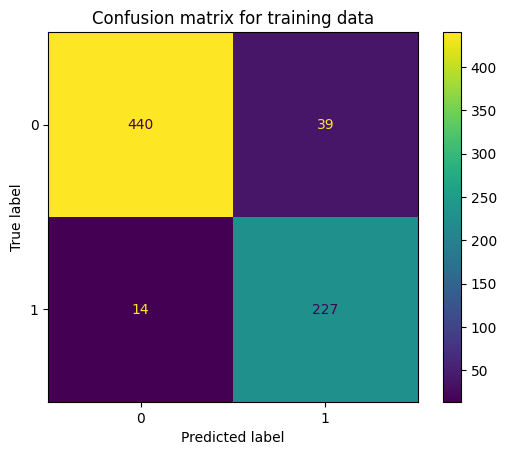

In [ ]:
#change the import to ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix for training data", None)]
for title, normalize in titles_options:
    #function called change to ConfusionMatrixDisplay.from_predictions with 2 parameters
    disp = ConfusionMatrixDisplay.from_predictions(y_train, pred)
    disp.ax_.set_title(title)

    print(title)

plt.show()

Last but not least, let's evaluate the model on the testing data.

In [ ]:
#Evaluate the model on the testing data
pred = model.predict(x_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       120
           1       0.83      0.89      0.86        61

    accuracy                           0.90       181
   macro avg       0.89      0.90      0.89       181
weighted avg       0.90      0.90      0.90       181

Confusion Matrix: 
 [[109  11]
 [  7  54]]

Accuracy:  0.9005524861878453


Confusion matrix for testing data
[[109  11]
 [  7  54]]


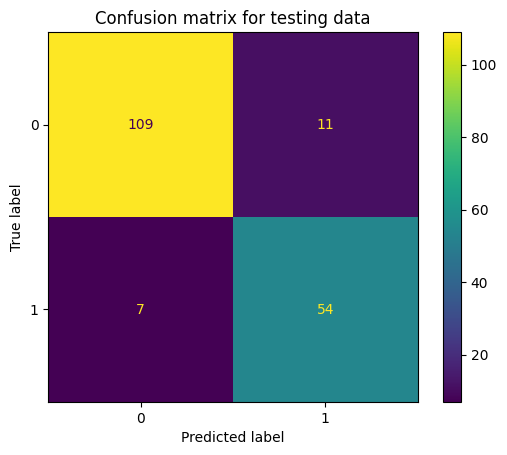

In [ ]:
#change the import to ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix for testing data", None)]
for title, normalize in titles_options:
      #function called change to ConfusionMatrixDisplay.from_predictions with 2 parameters
    disp = ConfusionMatrixDisplay.from_predictions(y_test, pred)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()